In [35]:
import pandas as pd
data = pd.read_csv('data/ghana_gdp.csv', parse_dates=["year"], index_col = ["year"])
data.tail()

,GDP (current US$)
year,
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


<AxesSubplot:xlabel='year'>

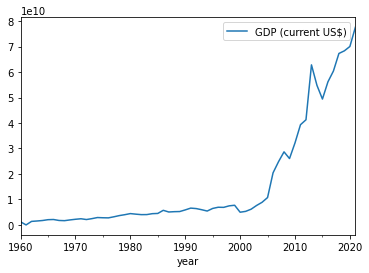

In [36]:
%matplotlib inline 
data.plot()

Отложите последние три года датасета как тестовую выборку для оценки результатов предсказания.

In [37]:
train_df = data.loc[:"2019-01-01"]
test_df = data.loc["2019-01-01":]
train_df.shape, test_df.shape

((60, 1), (3, 1))

Постройте модель скользящего среднего, проанализируйте результат. Для построения MA используйте метод rolling, который принимает в качестве параметра размер окна. Используйте среднее как функцию для сглаживания. Ширину окна подберите самостоятельно.

In [38]:
#train_df.rolling(2).sum()
train_df.rolling(window=2).mean()

,GDP (current US$)
year,
1960-01-01,NaN
1961-01-01,6.085434e+08
1962-01-01,6.911765e+08
1963-01-01,1.461485e+09
1964-01-01,1.635854e+09
1965-01-01,1.892157e+09
1966-01-01,2.089636e+09
1967-01-01,1.936428e+09
1968-01-01,1.706858e+09


<AxesSubplot:xlabel='year'>

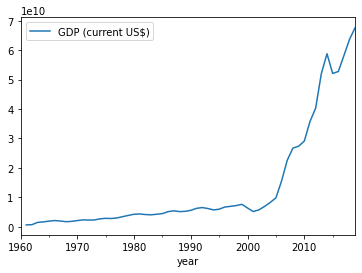

In [39]:
%matplotlib inline 
train_df.rolling(window=2).mean().plot()

Оцените стационарность временного ряда и примите решение о выборе модели ARMA/ARIMA. Выберите парамeтры p и q по коррелограммам ACF и PACF. Также постройте модель с параметрами, ближайшими к p и q, и сравните коэффициент AIC или подберите наилучшие параметры с помощью pmdarima, как в скринкасте.

In [40]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df["GDP (current US$)"])

(0.5782902144237619,
 0.9870681153049116,
 10,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 2239.7989988859235)

In [41]:
test1 = adfuller(train_df["GDP (current US$)"])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  0.5782902144237619
p-value:  0.9870681153049116
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [42]:
from matplotlib import pyplot as plt
import statsmodels.graphics.tsaplots as sgt

def plot_acf_pacf(series):
    plt.rcParams["figure.figsize"] = 18, 5

    fig, axes = plt.subplots(1, 2)
    
    sgt.plot_acf(series, lags = 58, ax = axes[0])
    sgt.plot_pacf(series, lags = 28, ax = axes[1])
    plt.show()

c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


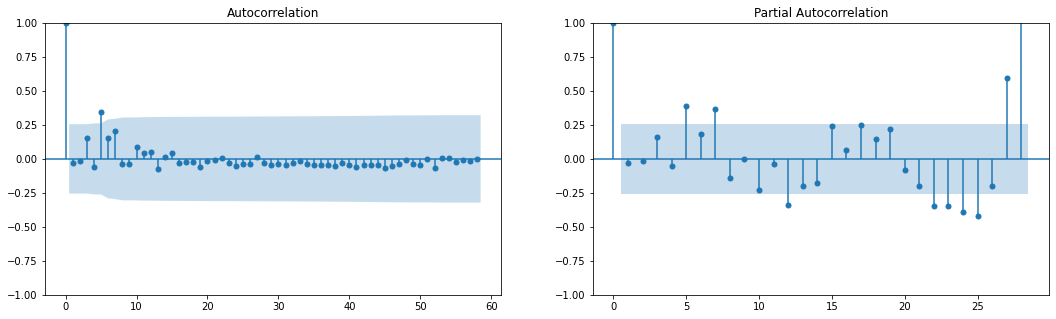

adf:  -1.5585831471388791
p-value:  0.5043580595671024
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
ряд нестационарен


In [43]:
plot_acf_pacf(train_df["GDP (current US$)"].diff(1).dropna())
test2 = adfuller(train_df["GDP (current US$)"].diff(1).dropna())
print ('adf: ', test2[0])
print ('p-value: ', test2[1])
print ('Critical values: ', test2[4])
if test2[0]> test2[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

In [44]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df["GDP (current US$)"].dropna(), order = (1, 1, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1385.001
Date:                Tue, 24 Jan 2023   AIC                           2776.003
Time:                        13:40:42   BIC                           2782.235
Sample:                    01-01-1960   HQIC                          2778.436
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9788      0.149      6.581      0.000       0.687       1.270
ma.L1         -0.8944      0.210     -4.261      0.000      -1.306      -0.483
sigma2      1.598e+19        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               368.62
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):             166.44   Skew:                             1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.34e+55. Standard errors may be unstable.
"""

In [45]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=10,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[10]             : AIC=2315.922, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[10]             : AIC=2313.238, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[10]             : AIC=2314.932, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[10]             : AIC=2315.329, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[10]             : AIC=2314.082, Time=0.05 sec
 ARIMA(0,1,0)(0,1,1)[10]             : AIC=2330.967, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[10]             : AIC=2331.985, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[10]             : AIC=2314.098, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[10]             : AIC=2314.248, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[10]             : AIC=2315.649, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[10] intercept   : AIC=2312.131, Time=0.03 sec
 ARIMA(0,1,0)(1,1,0)[10] intercept   : AIC=2312.174, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[10] intercept   : AIC=2312.360, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[10] intercept   : AIC=2314.091, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 10)   Log Likelihood               -1154.065
Date:                            Tue, 24 Jan 2023   AIC                           2312.131
Time:                                    13:40:44   BIC                           2315.914
Sample:                                01-01-1960   HQIC                          2313.566
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.427e+08   5.85e+08      1.440      0.150   -3.04e+08    1.99e+09
sigma2      1.678e+19      0.143   1.17e+20      0.000    1.68e+19    1.68e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               192.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              47.79   Skew:                             2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Постройте модель с наилучшими параметрами и выполните предсказание на три года.

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
seas_model = SARIMAX(train_df["GDP (current US$)"].dropna(), order = (0, 1, 0), seasonal_order = (0, 1, 0, 10))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  GDP (current US$)   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 10)   Log Likelihood               -1155.619
Date:                            Tue, 24 Jan 2023   AIC                           2313.238
Time:                                    13:40:44   BIC                           2315.129
Sample:                                01-01-1960   HQIC                          2313.955
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.429e+19   9.75e+17     14.650      0.000    1.24e+19    1.62e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               192.34
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             102.55   Skew:                             2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
pred_df = pd.DataFrame(index = data.index)
pred_df["model_preds"] = seas_model_fit.predict(start = test_df.index[1], end = test_df.index[-1])


pred_df["GDP (current US$)"] = data["GDP (current US$)"]

forecast = seas_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha = 0.05) # Confidence level of 95%

pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP (current US$)"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP (current US$)"]

Отобразите результат графически.

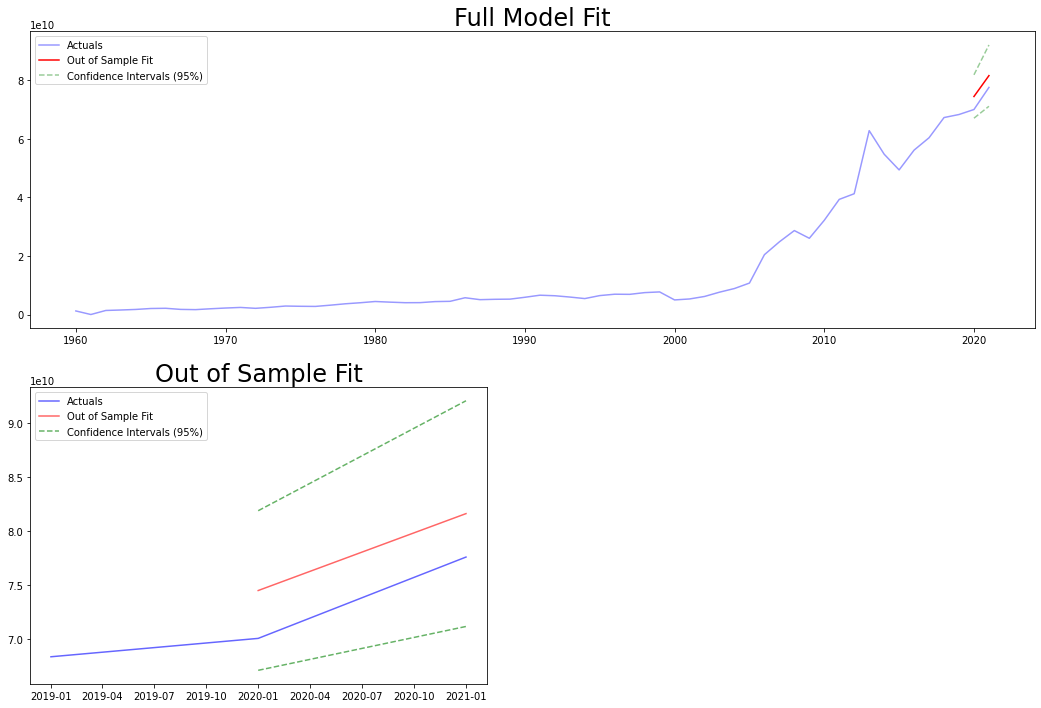

In [48]:
plt.rcParams["figure.figsize"] = 18, 12

plt.subplot(2, 1, 1)
plt.plot(pred_df["GDP (current US$)"], color = "blue", label = "Actuals", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit")
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.4)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.4)
plt.title("Full Model Fit", size = 24)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(pred_df.loc[test_df.index]["GDP (current US$)"], color = "blue", label = "Actuals", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds"], color = "red", linestyle = "-", label = "Out of Sample Fit", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_lower"], color = "green", linestyle = "--", label = "Confidence Intervals (95%)", alpha = 0.6)
plt.plot(pred_df.loc[test_df.index]["model_preds_upper"], color = "green", linestyle = "--", alpha = 0.6)
plt.title("Out of Sample Fit", size = 24)
plt.legend()

plt.show()

Модель уловила тренд, предсказания попали в доверительный интервал. Выбранная модель справилась с поставленной задачей! Используем для предсказания!

Проверьте данные на наличие пропущенных дат.

In [49]:
data.asfreq(freq='AS')

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


Проверьте данные на наличие пропущенных значений.

In [50]:
print(data.isnull().sum().sum())

0


Обратите внимание, что иногда пропуски в данных могут быть заполнены нулями. Сделайте проверку на наличие нулевых значений и в случае нахождения замените их на NaN.

In [51]:
import numpy as np
data['GDP (current US$)'] = data['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)

Для заполнения пропусков выполните интерполяцию с использованием метода .interpolate()

(62, 1)


<AxesSubplot:xlabel='year'>

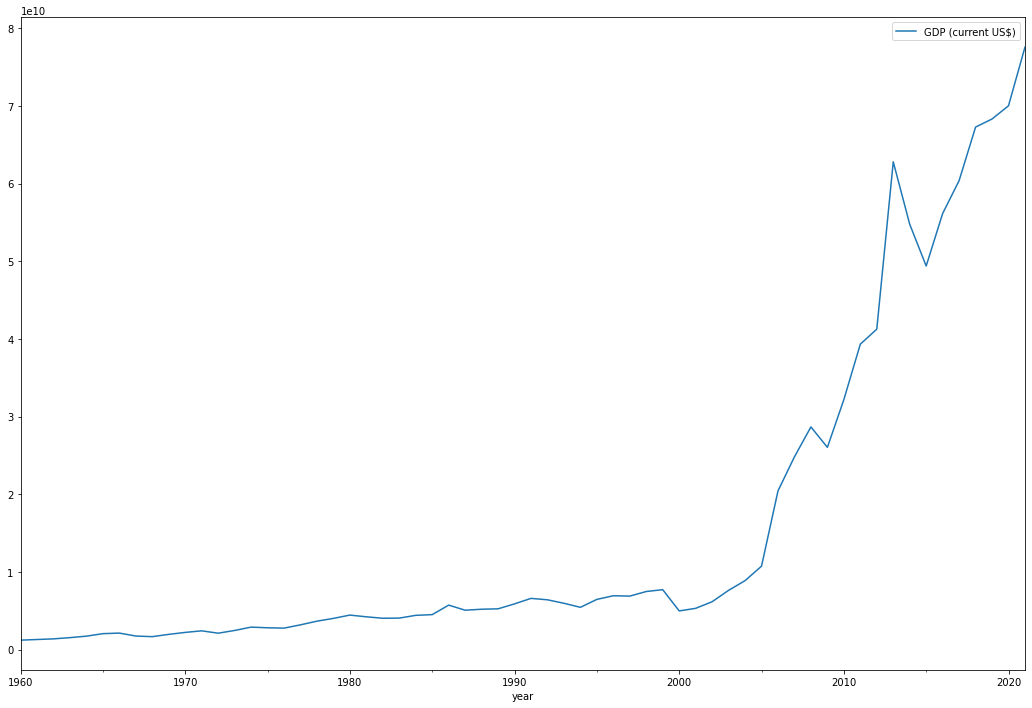

In [71]:
data_int = pd.DataFrame(data['GDP (current US$)'].interpolate(), columns = ['GDP (current US$)'])
print(data_int.shape)
data_int.plot()


Проверьте полученный ряд на стационарность, определите параметры модели (ARIMA/ARMA) и запустите модель

In [72]:
train_df = data_int.loc[:"2018-01-01"]
test_df = data_int.loc["2019-01-01":]
train_df.shape, test_df.shape

((59, 1), (3, 1))

In [73]:
from statsmodels.tsa.stattools import adfuller

adfuller(train_df)

(0.8030073326980092,
 0.9916845572455876,
 10,
 48,
 {'1%': -3.5745892596209488,
  '5%': -2.9239543084490744,
  '10%': -2.6000391840277777},
 2194.307284305165)

In [74]:
adfuller(train_df['GDP (current US$)'])
test1 = adfuller(train_df['GDP (current US$)'])
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  0.8030073326980092
p-value:  0.9916845572455876
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
ряд нестационарен


In [75]:
import pmdarima as pm

smodel = pm.auto_arima(train_df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=10,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[10]             : AIC=2269.489, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[10]             : AIC=2266.073, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[10]             : AIC=2268.247, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[10]             : AIC=2268.555, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[10]             : AIC=2267.437, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[10]             : AIC=2284.607, Time=0.08 sec
 ARIMA(0,1,0)(1,1,1)[10]             : AIC=2286.362, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[10]             : AIC=2266.944, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[10]             : AIC=2267.115, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[10]             : AIC=2268.635, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[10] intercept   : AIC=2265.260, Time=0.04 sec
 ARIMA(0,1,0)(1,1,0)[10] intercept   : AIC=2265.848, Time=0.09 sec
 ARIMA(0,1,0)(0,1,1)[10] intercept   : AIC=2265.889, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[10] intercept   : AIC=2267.753, Time=0.14 sec
 ARIMA(1,1,0)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   59
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 10)   Log Likelihood               -1130.630
Date:                            Tue, 24 Jan 2023   AIC                           2265.260
Time:                                    14:04:21   BIC                           2269.002
Sample:                                01-01-1960   HQIC                          2266.674
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.838e+08   5.93e+08      1.322      0.186   -3.78e+08    1.95e+09
sigma2      1.686e+19      0.149   1.13e+20      0.000    1.69e+19    1.69e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               199.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              75.73   Skew:                             2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
seas_model = SARIMAX(train_df.dropna(), order = (0, 1, 0), seasonal_order = (0, 1, 0, 10))
seas_model_fit = seas_model.fit()
seas_model_fit.summary()

c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                  GDP (current US$)   No. Observations:                   59
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 10)   Log Likelihood               -1132.036
Date:                            Tue, 24 Jan 2023   AIC                           2266.073
Time:                                    14:04:29   BIC                           2267.944
Sample:                                01-01-1960   HQIC                          2266.780
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.422e+19   9.66e+17     14.724      0.000    1.23e+19    1.61e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               199.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):             242.46   Skew:                             2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Изменился AIC критерий построенной модели по сравнению с моделью на неинтерполированных данных - уменьшился <=> улучшился.

In [77]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3, test_size=7)

In [78]:

train_test_groups = tscv.split(data) 
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 41 TEST size: 7
TRAIN size: 48 TEST size: 7
TRAIN size: 55 TEST size: 7


Посчитайте волатильность для вашего временного ряда.

In [79]:
data['GDP (current US$)_vol'] = data['GDP (current US$)'].pct_change(1).mul(100).abs()
data['GDP (current US$)_vol'].head()

year
1960-01-01          NaN
1961-01-01     0.000000
1962-01-01    13.578826
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP (current US$)_vol, dtype: float64

<AxesSubplot:xlabel='year'>

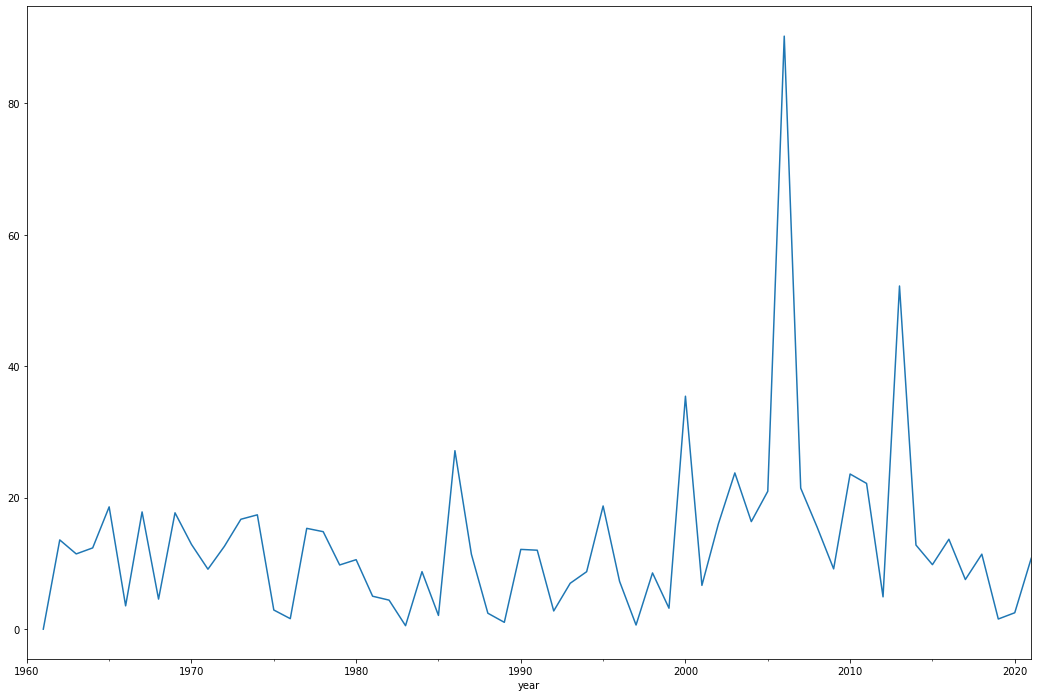

In [80]:
data['GDP (current US$)_vol'].plot()

Используйте GARCH-модель для предсказания волатильности

In [89]:
train_df = data.loc[:"2019-01-01"]
test_df = data.loc["2019-01-01":]

In [91]:
garch_df = pd.DataFrame(data['GDP (current US$)_vol'].loc[data.index]) 
garch_df.loc[train_df.index, 'GDP (current US$)_vol'] = train_df['GDP (current US$)_vol'].dropna()

In [92]:
from arch import arch_model
model = arch_model(garch_df['GDP (current US$)_vol'].dropna(), p = 2, q = 2, vol = "GARCH")
model_results = model.fit(last_obs = test_df.index[0], update_freq = 5)

Iteration:      5,   Func. Count:     39,   Neg. LLF: 229.3859465639944
Iteration:     10,   Func. Count:     75,   Neg. LLF: 227.7029573981161
Iteration:     15,   Func. Count:    110,   Neg. LLF: 227.56407851901568
Iteration:     20,   Func. Count:    145,   Neg. LLF: 227.48396484447403
Optimization terminated successfully    (Exit mode 0)
            Current function value: 227.48361196906473
            Iterations: 23
            Function evaluations: 158
            Gradient evaluations: 22


In [93]:
predictions_df = test_df.copy()
predictions_df["Predictions"] = model_results.forecast().residual_variance.loc[test_df.index]

c:\Users\SEMEN\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


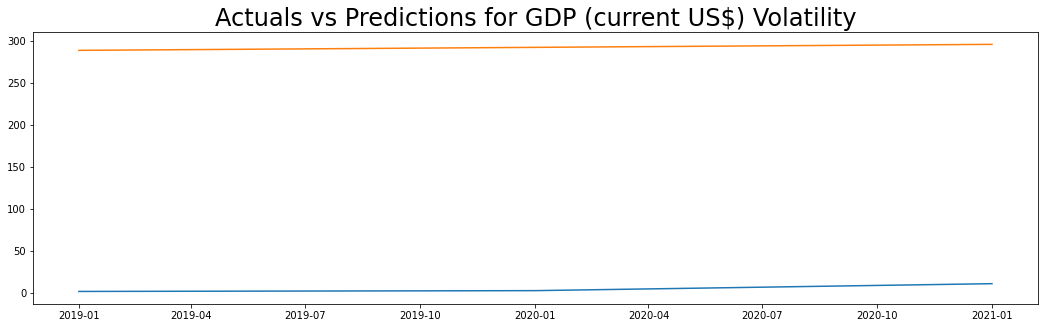

In [94]:
plt.rcParams["figure.figsize"] = 18, 5

plt.plot(predictions_df['GDP (current US$)_vol'].abs())
plt.plot(predictions_df["Predictions"])

plt.title("Actuals vs Predictions for GDP (current US$) Volatility", size = 24)

plt.show()

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predictions_df['GDP (current US$)_vol'].abs(), predictions_df["Predictions"]))

286.96620789285606

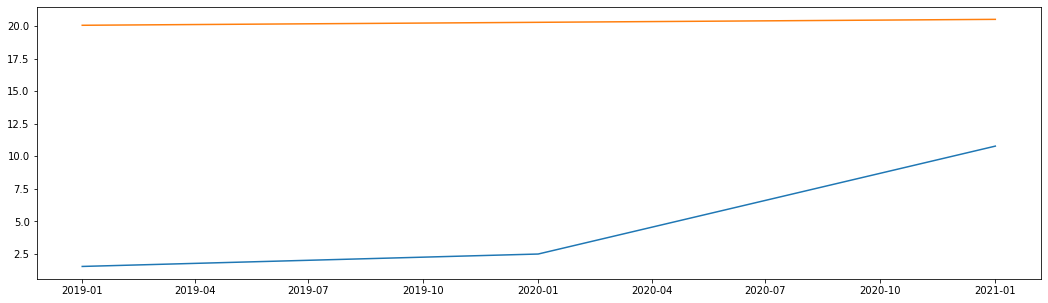

In [88]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(data['GDP (current US$)_vol'].shape[0]))[:train_df.shape[0]].fillna(0)
X_test = pd.DataFrame(range(data['GDP (current US$)_vol'].shape[0]))[train_df.shape[0]:].fillna(0)
y_train = train_df['GDP (current US$)_vol'].fillna(0)
y_test = test_df['GDP (current US$)_vol'].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test)
plt.plot(pd.Series(lr_predict, index=y_test.index))

модель не уловила дисперсию, так как такое поведение было для неё новым и подобные случаи отсутствовали в обучающей выборке